In [1]:
!mkdir -p /root/.config/kaggle/
!cp /content/drive/MyDrive/kaggle.json /root/.config/kaggle/kaggle.json
!chmod 600 /root/.config/kaggle/kaggle.json

In [2]:
import kaggle

kaggle.api.authenticate()

kaggle.api.dataset_download_files('vinayakshanawad/heart-rate-prediction-to-monitor-stress-level', path="/content/drive/MyDrive/ML/Stress_level_detection", unzip=True)

Dataset URL: https://www.kaggle.com/datasets/vinayakshanawad/heart-rate-prediction-to-monitor-stress-level


In [3]:
# Import necessary libraries
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ML/Stress_level_detection/train.csv')

In [5]:
# Display the first few rows and basic information about the dataset
print(df.head())
print(df.info())

      MEAN_RR   MEDIAN_RR        SDRR      RMSSD       SDSD  SDRR_RMSSD  \
0  885.157845  853.763730  140.972741  15.554505  15.553371    9.063146   
1  939.425371  948.357865   81.317742  12.964439  12.964195    6.272369   
2  898.186047  907.006860   84.497236  16.305279  16.305274    5.182201   
3  881.757864  893.460030   90.370537  15.720468  15.720068    5.748591   
4  809.625331  811.184865   62.766242  19.213819  19.213657    3.266724   

          HR      pNN25     pNN50        SD1  ...         HF    HF_PCT  \
0  69.499952  11.133333  0.533333  11.001565  ...  15.522602  0.421047   
1  64.363150   5.600000  0.000000   9.170129  ...   2.108525  0.070133   
2  67.450066  13.066667  0.200000  11.533417  ...  13.769729  0.512671   
3  68.809562  11.800000  0.133333  11.119476  ...  18.181913  0.529387   
4  74.565728  20.200000  0.200000  13.590641  ...  48.215822  1.839473   

      HF_NU           TP       LF_HF     HF_LF    sampen    higuci  datasetId  \
0  1.514737  3686.66615

In [6]:
# Exploratory Data Analysis (EDA)
print(df.describe())

             MEAN_RR      MEDIAN_RR           SDRR          RMSSD  \
count  369289.000000  369289.000000  369289.000000  369289.000000   
mean      846.650104     841.965890     109.352531      14.977498   
std       124.603984     132.321005      77.117025       4.120766   
min       547.492221     517.293295      27.233947       5.529742   
25%       760.228533     755.750735      64.205641      11.830959   
50%       822.951438     819.689595      82.608243      14.415918   
75%       924.117422     916.821570     118.237002      17.927144   
max      1322.016957    1653.122250     563.486949      26.629477   

                SDSD     SDRR_RMSSD             HR          pNN25  \
count  369289.000000  369289.000000  369289.000000  369289.000000   
mean       14.976767       7.396597      73.941824       9.841143   
std         4.120768       5.143834      10.337453       8.195574   
min         5.529630       2.660381      48.737243       0.000000   
25%        11.830671       4.5418

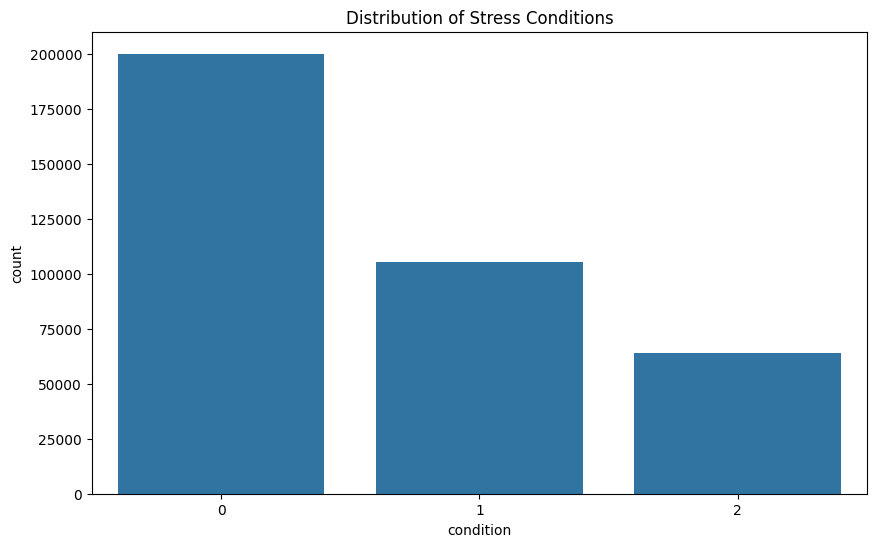

In [7]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='condition', data=df)
plt.title('Distribution of Stress Conditions')
plt.show()

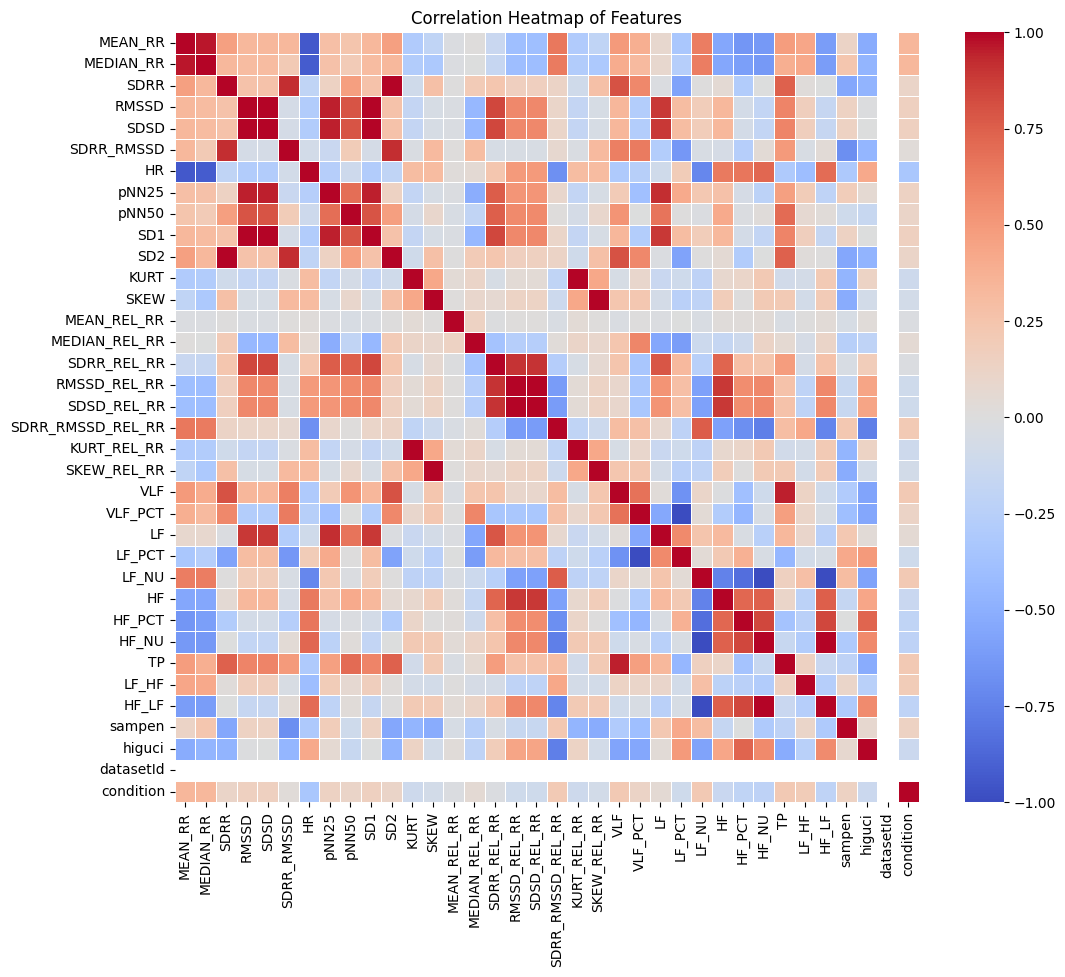

In [25]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

In [9]:
# Define features and target variable
label = ['condition']
features = ['MEAN_RR', 'RMSSD', 'pNN25', 'pNN50', 'LF', 'HF', 'LF_HF']

In [10]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

In [11]:
# Prepare the data for training
X = df[features].values
y = df[label].values

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [14]:
# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu', kernel_initializer='he_normal', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(20, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(3, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=1024, verbose=1)

Epoch 1/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.5974 - loss: 0.9176 - val_accuracy: 0.7042 - val_loss: 0.6710
Epoch 2/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7310 - loss: 0.6302 - val_accuracy: 0.7736 - val_loss: 0.5362
Epoch 3/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7878 - loss: 0.5160 - val_accuracy: 0.8194 - val_loss: 0.4480
Epoch 4/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8297 - loss: 0.4325 - val_accuracy: 0.8421 - val_loss: 0.3889
Epoch 5/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8526 - loss: 0.3777 - val_accuracy: 0.8650 - val_loss: 0.3504
Epoch 6/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8687 - loss: 0.3416 - val_accuracy: 0.8735 - val_loss: 0.3235
Epoch 7/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8787 - loss: 0.3159 - val_accuracy: 0.8853 - val_loss: 0.2983
Epoch 8/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8847 - loss: 0.2947 - val_accuracy: 

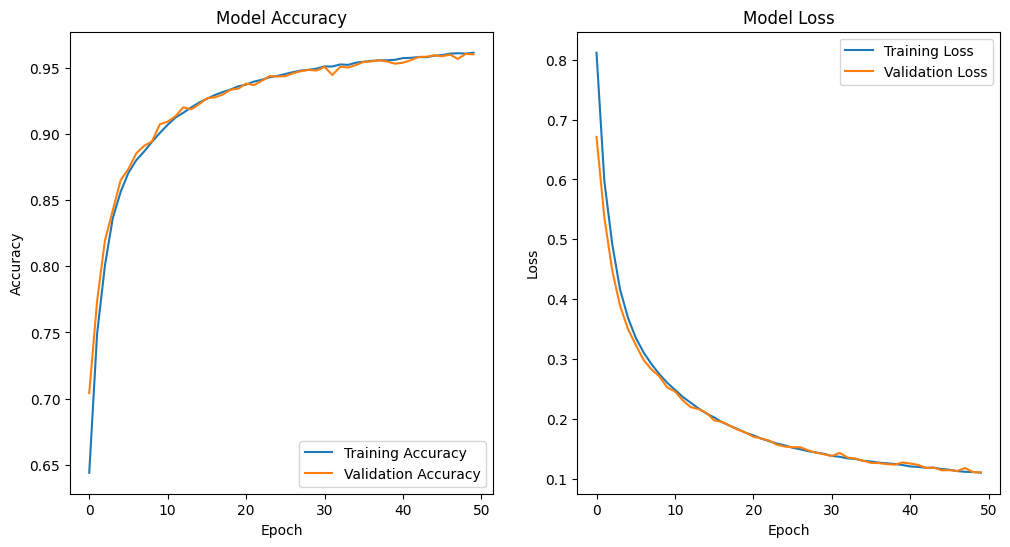

In [17]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.9601


In [19]:
# Load and preprocess the test dataset
df_test = pd.read_csv('/content/drive/MyDrive/ML/Stress_level_detection/test.csv')
df_test[features] = scaler.transform(df_test[features])
X_test_final = df_test[features].values
y_test_final = df_test[label].values

In [20]:
# Convert test labels to categorical
y_test_final = tf.keras.utils.to_categorical(y_test_final)

In [21]:
# Evaluate the model on the final test set
final_loss, final_accuracy = model.evaluate(X_test_final, y_test_final, verbose=1)
print(f"Final test accuracy: {final_accuracy:.4f}")

1283/1283 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9595 - loss: 0.1098
Final test accuracy: 0.9604


In [22]:
# Function to predict stress level
def predict_stress(data):
    # Ensure data is a 2D array
    if len(data.shape) == 1:
        data = data.reshape(1, -1)

    # Scale the input data
    scaled_data = scaler.transform(data)

    # Make prediction
    prediction = model.predict(scaled_data)

    # Get the predicted class
    predicted_class = np.argmax(prediction, axis=1)

    return predicted_class[0]

In [23]:
# Example usage of the prediction function
sample_data = df_test[features].iloc[5545].values
predicted_stress = predict_stress(sample_data)
actual_stress = df_test[label].iloc[5545].values[0]
print(f"Predicted stress level: {predicted_stress}")
print(f"Actual stress level: {actual_stress}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
Predicted stress level: 0
Actual stress level: 0


In [24]:
# Save the model and scaler
model.save('/content/drive/MyDrive/ML/Stress_level_detection/stress_detection_model.keras')
import joblib
joblib.dump(scaler, '/content/drive/MyDrive/ML/Stress_level_detection/scaler.joblib')

print("Model and scaler saved successfully.")

Model and scaler saved successfully.
